# Mengimpor Library

In [1]:
# Import library pandas untuk manipulasi dan analisis data
import pandas as pd
# Import library numpy untuk operasi numerik
import numpy as np
# Import train_test_split dari sklearn untuk membagi dataset menjadi data pelatihan dan pengujian
from sklearn.model_selection import train_test_split
# Import LinearRegression dari sklearn untuk membuat model regresi linear
from sklearn.linear_model import LinearRegression
# Import mean_squared_error dari sklearn untuk mengukur performa model regresi
from sklearn.metrics import mean_squared_error
# Import matplotlib.pyplot dan seaborn untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca Data

In [2]:
data_korup = pd.read_csv('R04_corruptions.csv')
data_korup

,Corruption Perception (X),Government Transparency (Y)
0,3.2,65
1,2.5,72
2,4.1,58
3,2.8,68
4,3.5,60
5,2.4,75
6,3.9,55
7,2.7,70
8,3.8,57
9,2.9,71


In [3]:
print("Dataset Overview:")
print(data_korup.head())
print("\nDescriptive Statistics:")
print(data_korup.describe())

Dataset Overview:
   Corruption Perception (X)  Government Transparency (Y)
0                        3.2                           65
1                        2.5                           72
2                        4.1                           58
3                        2.8                           68
4                        3.5                           60

Descriptive Statistics:
       Corruption Perception (X)  Government Transparency (Y)
count                  55.000000                    55.000000
mean                    3.307273                    64.145455
std                     0.784539                     9.314302
min                     2.000000                    50.000000
25%                     2.650000                    56.000000
50%                     3.300000                    63.000000
75%                     4.000000                    71.500000
max                     4.500000                    82.000000


In [4]:
print("\nDistribution of 'Corruption Perception (X)':")
print(data_korup['Corruption Perception (X)'].value_counts())
print("\nDistribution of 'Government Transparency (Y)':")
print(data_korup['Government Transparency (Y)'].value_counts())


Distribution of 'Corruption Perception (X)':
2.8    3
4.5    3
4.4    3
4.3    3
3.2    2
4.0    2
3.6    2
2.0    2
3.7    2
2.1    2
3.3    2
2.2    2
3.4    2
2.3    2
2.5    2
3.0    2
2.6    2
4.2    2
2.9    2
3.8    2
2.7    2
3.9    2
2.4    2
3.5    2
4.1    2
3.1    1
Name: Corruption Perception (X), dtype: int64

Distribution of 'Government Transparency (Y)':
65    3
54    3
53    3
62    2
69    2
61    2
51    2
82    2
59    2
52    2
80    2
63    2
78    2
56    2
72    2
76    2
73    2
71    2
57    2
70    2
55    2
75    2
60    2
68    2
58    2
66    1
50    1
Name: Government Transparency (Y), dtype: int64


# Preprocessing Data

In [5]:
print("\nHandling Missing Values:")
print("Number of Missing Values:")
print(data_korup.isnull().sum())
data_korup.fillna(data_korup.mean(), inplace=True)


Handling Missing Values:
Number of Missing Values:
Corruption Perception (X)      0
Government Transparency (Y)    0
dtype: int64


In [6]:
X = data_korup[['Corruption Perception (X)']]
Y = data_korup['Government Transparency (Y)']

# Latih Data

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [8]:
model_regresi = LinearRegression()
model_regresi.fit(X_train, Y_train)

LinearRegression()

In [9]:
print(model_regresi.intercept_)
print(model_regresi.coef_)

99.94197593599009
[-10.82303393]


In [10]:
99.94197593599009 + -10.82303393 * 1.5

83.70742504099009

In [11]:
Y_pred = model_regresi.predict(X_test)

# Evaluasi Data

In [12]:
mse = mean_squared_error(Y_test, Y_pred)
print('\nModel Evaluation:')
print('Mean Squared Error:', mse)


Model Evaluation:
Mean Squared Error: 4.593681082998803


In [13]:
dataframe = pd.DataFrame({'Data Real': Y_test, 'Data Prediksi': Y_pred})
dataframe

,Data Real,Data Prediksi
45,78,76.131301
33,65,67.472874
40,71,68.555178
26,55,54.485233
11,73,71.802088
2,58,55.567537
32,53,52.320627
43,52,56.649840
46,53,52.320627
30,57,57.732144


# Visualisasi Data

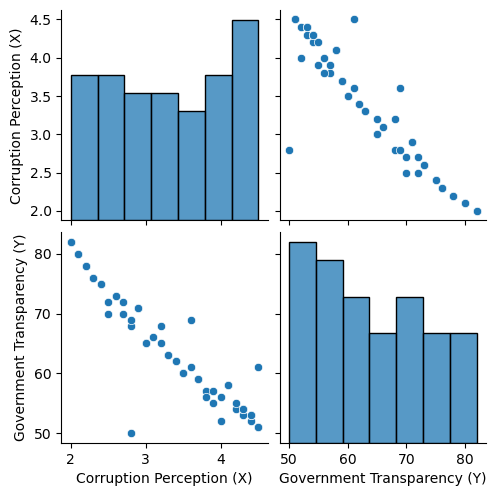

In [14]:
sns.pairplot(data_korup)

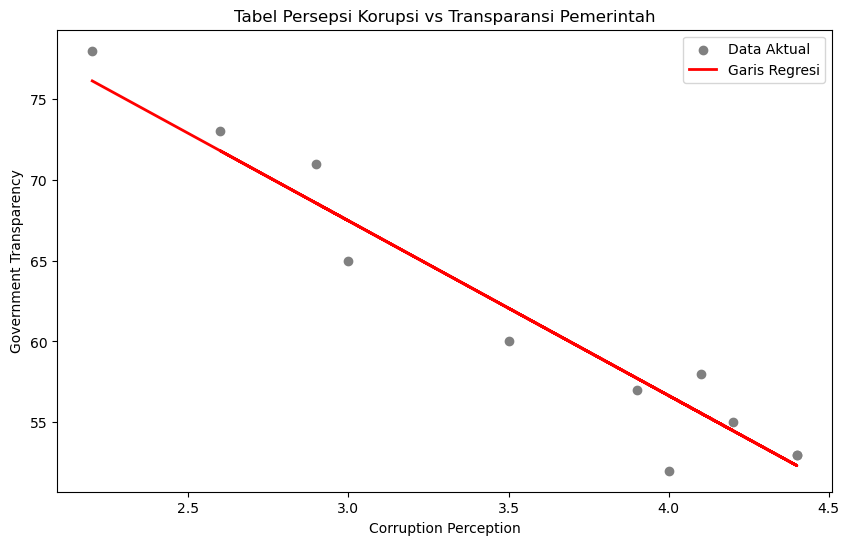

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, Y_test, color='gray', label='Data Aktual')
plt.plot(X_test, Y_pred, color='red', linewidth=2, label='Garis Regresi')
plt.title('Tabel Persepsi Korupsi vs Transparansi Pemerintah')
plt.xlabel('Corruption Perception')
plt.ylabel('Government Transparency')
plt.legend()
plt.show()